In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Step 2: Load and display the sample data
data = {
    'Age': [19, 21, 20, 23, 31, 22, 35, 25, 23, 64, 30, 67, 35, 58, 24],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 79, 65, 76, 76, 94],
    'Segment': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]  # 0: Low-value, 1: High-value
}

In [3]:
df = pd.DataFrame(data)

In [4]:
print('Sample Data: ')
print(df.head())

Sample Data: 
   Age  Annual Income (k$)  Spending Score (1-100)  Segment
0   19                  15                      39        0
1   21                  15                      81        1
2   20                  16                       6        0
3   23                  16                      77        1
4   31                  17                      40        0


In [5]:
# Step 3: Data Preprocessing
X = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
Y = df['Segment']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 4: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [12]:
# Step 5: Apply KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [14]:
# Step 6: Evaluation
print("/nConfusion Matrix: ")
print(confusion_matrix(Y_test,y_pred))
print("/nClassification Report: ")
print(classification_report(Y_test, y_pred))
print("/nAccuracy Score: ")
print(accuracy_score(Y_test, y_pred))

/nConfusion Matrix: 
[[1 0]
 [0 2]]
/nClassification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

/nAccuracy Score: 
1.0


In [15]:
# Step 7: Classify New User Input
new_user_data = {'Age':[27], 'Annual Income (k$)':[23], 'Spending Score (1-100)':[60]}
new_user_df = pd.DataFrame(new_user_data)
new_user_scaled = scaler.transform(new_user_df)

new_user_segment = knn.predict(new_user_scaled)
new_user_df['Segment'] = new_user_segment
print("/nNew User Data Prediction: ")
print(new_user_df)

/nNew User Data Prediction: 
   Age  Annual Income (k$)  Spending Score (1-100)  Segment
0   27                  23                      60        1


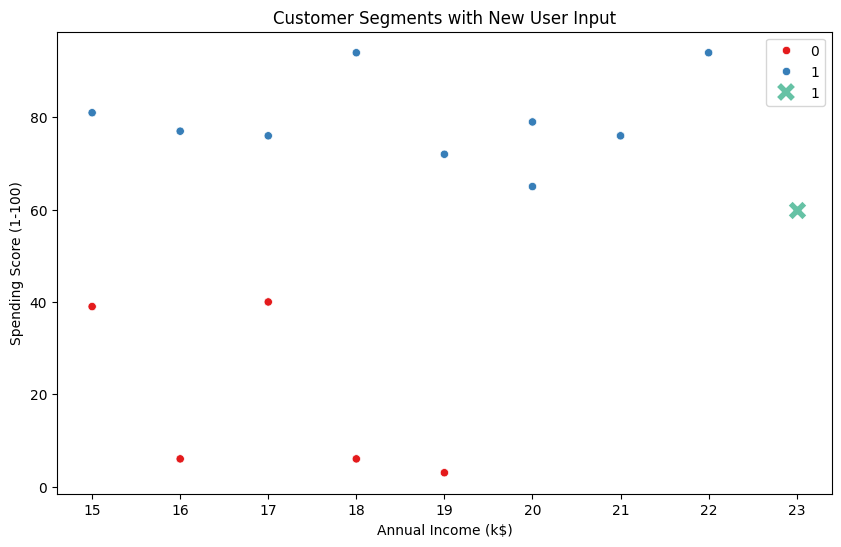

In [18]:
# Visualization: Scatter Plot of the Customer Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', data=df, palette='Set1', marker='o')
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', data=new_user_df, palette='Set2', marker='X', s=200)
plt.title('Customer Segments with New User Input')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

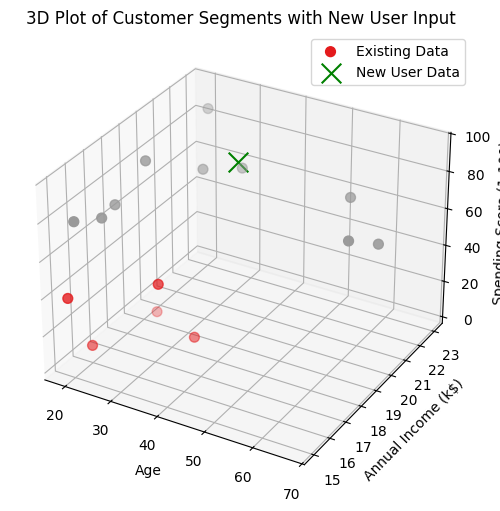

In [24]:
# Visualization: 3D plot for KNN decision boundaries and customer segments including new user inputs
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the exisiting data with the original values
ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c = Y, cmap='Set1', s=50, label='Existing Data')

# Plot new user input with original values
ax.scatter(new_user_df['Age'], new_user_df['Annual Income (k$)'], new_user_df['Spending Score (1-100)'], c = 'green', marker='x', s=200, label='New User Data')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Plot of Customer Segments with New User Input')
ax.legend()
plt.show()